# Assignment Capstone

### Setup

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import random

import seaborn as sn
import matplotlib.pyplot as plt

import yfinance as yf

from datetime import date
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from scipy.stats import norm
from scipy.stats import linregress
import itertools
from scipy.optimize import minimize

In [ ]:
My_Portfolio_X = pd.read_csv('BBG_data_2024.csv')

In [ ]:
My_Portfolio_X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V7537,V7538,V7539,V7540,V7541,V7542,V7543,V7544,V7545,V7546
0,NaN,AGILENT TECHNOLOGIES INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,A UN Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Last Price,High Price,Low Price,Total Return Index (Gross Dividends),Historical Market Cap,Overridable Adjusted Beta,Dividend Per Share,Price to Book Ratio,Price Earnings Ratio (P/E),...,Overridable Adjusted Beta,Dividend Per Share,Price to Book Ratio,Price Earnings Ratio (P/E),Price to Sales Ratio,Price/Cash Flow,RSI 30 Day,Relative Share Price Momentum,Overridable Adjusted Beta,Volume
3,Dates,PX_LAST,PX_HIGH,PX_LOW,TOT_RETURN_INDEX_GROSS_DVDS,HISTORICAL_MARKET_CAP,BETA_ADJ_OVERRIDABLE,IS_DIV_PER_SHR,PX_TO_BOOK_RATIO,PE_RATIO,...,BETA_ADJ_OVERRIDABLE,IS_DIV_PER_SHR,PX_TO_BOOK_RATIO,PE_RATIO,PX_TO_SALES_RATIO,PX_TO_CASH_FLOW,RSI_30D,REL_SHR_PX_MOMENTUM,BETA_ADJ_OVERRIDABLE,PX_VOLUME
4,12/31/2009,22.2178,22.7183,22.1176,22.2178,NaN,1.0255,NaN,3.0676,44.8798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,3/25/2024,145.56,148.05,143.8,161.6215,NaN,1.0224,NaN,6.8932,29.691,...,0.9847,NaN,15.393,32.2489,9.0566,32.8537,37.4696,-14.8763,0.9847,673189
3585,3/26/2024,144.41,146.26,144.4,160.3446,NaN,1.0232,NaN,6.8387,29.4564,...,0.9854,NaN,15.1967,31.8376,8.9411,32.4348,36.288,-15.0243,0.9854,958624
3586,3/27/2024,147.37,147.48,144.61,163.6312,NaN,1.0242,NaN,6.9789,30.0602,...,0.9862,NaN,15.4572,32.3834,9.0944,32.9908,38.9319,-15.5623,0.9862,815064
3587,3/28/2024,145.51,147.68,145.36,161.566,NaN,1.0241,NaN,6.8908,29.6808,...,0.9862,NaN,15.5214,32.5179,9.1322,33.1278,39.5712,-15.9911,0.9862,925642


In [ ]:
My_Portfolio_X.iloc[1, :] = My_Portfolio_X.iloc[1, :].fillna(method='ffill')

for col in My_Portfolio_X.columns:
    My_Portfolio_X.loc[3, col] = str(My_Portfolio_X.iloc[1][col]) + " " + str(My_Portfolio_X.loc[3, col])

My_Portfolio_X = My_Portfolio_X.iloc[3:].reset_index(drop=True)

My_Portfolio_X.columns = My_Portfolio_X.iloc[0]

My_Portfolio_X = My_Portfolio_X.drop(0)

My_Portfolio_X = My_Portfolio_X.rename(columns={'nan Dates': 'Dates'})

My_Portfolio_X

,Dates,A UN Equity PX_LAST,A UN Equity PX_HIGH,A UN Equity PX_LOW,A UN Equity TOT_RETURN_INDEX_GROSS_DVDS,A UN Equity HISTORICAL_MARKET_CAP,A UN Equity BETA_ADJ_OVERRIDABLE,A UN Equity IS_DIV_PER_SHR,A UN Equity PX_TO_BOOK_RATIO,A UN Equity PE_RATIO,...,ZTS UN Equity BETA_ADJ_OVERRIDABLE,ZTS UN Equity IS_DIV_PER_SHR,ZTS UN Equity PX_TO_BOOK_RATIO,ZTS UN Equity PE_RATIO,ZTS UN Equity PX_TO_SALES_RATIO,ZTS UN Equity PX_TO_CASH_FLOW,ZTS UN Equity RSI_30D,ZTS UN Equity REL_SHR_PX_MOMENTUM,ZTS UN Equity BETA_ADJ_OVERRIDABLE,ZTS UN Equity PX_VOLUME
1,12/31/2009,22.2178,22.7183,22.1176,22.2178,NaN,1.0255,NaN,3.0676,44.8798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/4/2010,22.3822,22.6111,22.2678,22.3822,NaN,1.0247,NaN,3.0903,45.212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/5/2010,22.1391,22.275,22.0032,22.1391,NaN,1.0244,NaN,3.0567,44.7209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/2010,22.0604,22.1677,22.0032,22.0604,NaN,1.0244,NaN,3.0459,44.562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1/7/2010,22.0318,22.039,21.8102,22.0318,NaN,1.0244,NaN,3.0419,44.5043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,3/25/2024,145.56,148.05,143.8,161.6215,NaN,1.0224,NaN,6.8932,29.691,...,0.9847,NaN,15.393,32.2489,9.0566,32.8537,37.4696,-14.8763,0.9847,673189
3582,3/26/2024,144.41,146.26,144.4,160.3446,NaN,1.0232,NaN,6.8387,29.4564,...,0.9854,NaN,15.1967,31.8376,8.9411,32.4348,36.288,-15.0243,0.9854,958624
3583,3/27/2024,147.37,147.48,144.61,163.6312,NaN,1.0242,NaN,6.9789,30.0602,...,0.9862,NaN,15.4572,32.3834,9.0944,32.9908,38.9319,-15.5623,0.9862,815064
3584,3/28/2024,145.51,147.68,145.36,161.566,NaN,1.0241,NaN,6.8908,29.6808,...,0.9862,NaN,15.5214,32.5179,9.1322,33.1278,39.5712,-15.9911,0.9862,925642


In [ ]:
print(My_Portfolio_X.isnull().sum())

0
Dates                                        0
A UN Equity PX_LAST                          0
A UN Equity PX_HIGH                          0
A UN Equity PX_LOW                           0
A UN Equity TOT_RETURN_INDEX_GROSS_DVDS      0
                                          ... 
ZTS UN Equity PX_TO_CASH_FLOW              776
ZTS UN Equity RSI_30D                      806
ZTS UN Equity REL_SHR_PX_MOMENTUM          777
ZTS UN Equity BETA_ADJ_OVERRIDABLE         778
ZTS UN Equity PX_VOLUME                    776
Length: 7546, dtype: int64


In [ ]:
My_Portfolio_X['Dates'] = pd.to_datetime(My_Portfolio_X['Dates'])

My_Portfolio_X.sort_values(by='Dates', ascending=True, inplace=True)

In [ ]:
My_Portfolio_X

,Dates,A UN Equity PX_LAST,A UN Equity PX_HIGH,A UN Equity PX_LOW,A UN Equity TOT_RETURN_INDEX_GROSS_DVDS,A UN Equity HISTORICAL_MARKET_CAP,A UN Equity BETA_ADJ_OVERRIDABLE,A UN Equity IS_DIV_PER_SHR,A UN Equity PX_TO_BOOK_RATIO,A UN Equity PE_RATIO,...,ZTS UN Equity BETA_ADJ_OVERRIDABLE,ZTS UN Equity IS_DIV_PER_SHR,ZTS UN Equity PX_TO_BOOK_RATIO,ZTS UN Equity PE_RATIO,ZTS UN Equity PX_TO_SALES_RATIO,ZTS UN Equity PX_TO_CASH_FLOW,ZTS UN Equity RSI_30D,ZTS UN Equity REL_SHR_PX_MOMENTUM,ZTS UN Equity BETA_ADJ_OVERRIDABLE,ZTS UN Equity PX_VOLUME
1,2009-12-31,22.2178,22.7183,22.1176,22.2178,NaN,1.0255,NaN,3.0676,44.8798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,22.3822,22.6111,22.2678,22.3822,NaN,1.0247,NaN,3.0903,45.212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-05,22.1391,22.275,22.0032,22.1391,NaN,1.0244,NaN,3.0567,44.7209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-06,22.0604,22.1677,22.0032,22.0604,NaN,1.0244,NaN,3.0459,44.562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-01-07,22.0318,22.039,21.8102,22.0318,NaN,1.0244,NaN,3.0419,44.5043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2024-03-25,145.56,148.05,143.8,161.6215,NaN,1.0224,NaN,6.8932,29.691,...,0.9847,NaN,15.393,32.2489,9.0566,32.8537,37.4696,-14.8763,0.9847,673189
3582,2024-03-26,144.41,146.26,144.4,160.3446,NaN,1.0232,NaN,6.8387,29.4564,...,0.9854,NaN,15.1967,31.8376,8.9411,32.4348,36.288,-15.0243,0.9854,958624
3583,2024-03-27,147.37,147.48,144.61,163.6312,NaN,1.0242,NaN,6.9789,30.0602,...,0.9862,NaN,15.4572,32.3834,9.0944,32.9908,38.9319,-15.5623,0.9862,815064
3584,2024-03-28,145.51,147.68,145.36,161.566,NaN,1.0241,NaN,6.8908,29.6808,...,0.9862,NaN,15.5214,32.5179,9.1322,33.1278,39.5712,-15.9911,0.9862,925642


### Filtering Data

In [ ]:
sp500_tickers = [col for col in My_Portfolio_X.columns if 'UN Equity' in col]
filtered_data = My_Portfolio_X[['Dates'] + [col for col in My_Portfolio_X.columns if 'PX_LAST' in col]].copy()

filtered_data['Dates'] = pd.to_datetime(filtered_data['Dates'])
filtered_data.set_index('Dates', inplace=True)

In [ ]:
filtered_data

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST,WY UN Equity PX_LAST,WYNN UW Equity PX_LAST,XEL UW Equity PX_LAST,XOM UN Equity PX_LAST,XYL UN Equity PX_LAST,YUM UN Equity PX_LAST,ZBH UN Equity PX_LAST,ZBRA UW Equity PX_LAST,ZTS UN Equity PX_LAST
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.95,41.5,36.78,NaN,...,NaN,17.6557,58.23,NaN,68.19,NaN,25.1453,57.344,28.36,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,18.1222,63.96,NaN,69.15,NaN,25.2316,58.2268,28.67,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.7,NaN,...,NaN,18.5069,67.85,NaN,69.42,NaN,25.1453,60.07,28.62,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,18.3023,66.96,NaN,70.02,NaN,24.9656,60.0506,28.4,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.206,7.8867,42.74,36.89,NaN,...,NaN,18.2205,68.39,NaN,69.8,NaN,24.9584,61.4282,27.69,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.56,14.92,170.85,178.53,167.99,110.01,90.99,333.82,507.23,190.63,...,273.72,35.49,99.41,52.48,114.65,127.76,134.62,127.91,297.94,167.81
2024-03-26,144.41,14.92,169.71,179.19,167.39,111.5,90.59,336.39,507.6,188.96,...,274.14,35.45,100.58,51.8,113.79,127.9,134.8,127.87,291.38,165.67
2024-03-27,147.37,15.3,173.31,180.35,166.41,113.48,91.48,340.94,504.4,193.33,...,275.92,35.93,101.79,53.38,114.97,129.38,137.32,132.61,299.16,168.51


In [ ]:
close_price_data = filtered_data

##Secondary Data

In [ ]:
# Load the data from the uploaded Excel file
file_path = 'VIX_Data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe and the column names to understand its structure
data.head(), data.columns
# Sort data by date just in case it's not in order
data.sort_values('Date', inplace=True)


# Compute the 'leverage_multiple'
data['leverage_multiple'] = 1.0  # Default value

# Initialize variables to track the last intersection's value
last_leverage = 1.0

# Iterate through the DataFrame to adjust 'leverage_multiple' based on the specified condition
for i in range(1, len(data)):
    previous_close_above_ma = data.loc[i-1, 'Close'] > data.loc[i-1, '50 day MA']
    current_close_below_ma = data.loc[i, 'Close'] < data.loc[i, '50 day MA']
    previous_close_below_ma = data.loc[i-1, 'Close'] < data.loc[i-1, '50 day MA']
    current_close_above_ma = data.loc[i, 'Close'] > data.loc[i, '50 day MA']

    # Check for crossing from above to below
    if previous_close_above_ma and current_close_below_ma:
        data.loc[i, 'leverage_multiple'] = 1.0       #Leverage Overlay OFF
        last_leverage = 1.0                          #Leverage Overaly OFF
    # Check for crossing from below to above
    elif previous_close_below_ma and current_close_above_ma:
        data.loc[i, 'leverage_multiple'] = 1
        last_leverage = 1
    else:
        data.loc[i, 'leverage_multiple'] = last_leverage  # Carry forward the last value

In [ ]:
data.rename(columns = {'Date':'Dates'}, inplace=True)

# # Display the first few rows to check the implementation
# data.head()
data.to_csv('Modified_VIX_Data.csv', index=False)
# Modified_VIX_Data['Date'] = pd.to_datetime(Modified_VIX_Data['Date'])

In [ ]:
# Display the first few rows to check the implementation
data.head()
#data.to_csv('Modified_VIX_Data.csv', index=False)
Modified_VIX_Data = pd.read_csv("Modified_VIX_Data.csv")
Modified_VIX_Data['Dates'] = pd.to_datetime(Modified_VIX_Data['Dates'])
Modified_VIX_Data.rename(columns = {'Date':'Dates'}, inplace=True)

In [ ]:
Modified_VIX_Data

,Dates,Close,50 day MA,leverage_multiple
0,1991-03-15,14.90,23.5308,1.0
1,1991-03-18,15.79,23.2880,1.0
2,1991-03-19,16.11,23.0664,1.0
3,1991-03-20,16.04,22.8082,1.0
4,1991-03-21,16.86,22.5378,1.0
...,...,...,...,...
8347,2024-04-18,18.00,14.5810,1.0
8348,2024-04-19,18.71,14.6994,1.0
8349,2024-04-22,16.94,14.7796,1.0
8350,2024-04-23,15.69,14.8148,1.0


### Calculating 6-Month Momentum

In [ ]:
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')

In [ ]:
original_columns = filtered_data.columns

In [ ]:
for column in original_columns:
  filtered_data[column + " 6_Month_Momentum"] = filtered_data[column].pct_change(126) * 100

filtered_data

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Weighted Momentum 6_Month_Momentum,WY UN Equity PX_LAST Weighted Momentum 6_Month_Momentum,WYNN UW Equity PX_LAST Weighted Momentum 6_Month_Momentum,XEL UW Equity PX_LAST Weighted Momentum 6_Month_Momentum,XOM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum,XYL UN Equity PX_LAST Weighted Momentum 6_Month_Momentum,YUM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum,ZBH UN Equity PX_LAST Weighted Momentum 6_Month_Momentum,ZBRA UW Equity PX_LAST Weighted Momentum 6_Month_Momentum,ZTS UN Equity PX_LAST Weighted Momentum 6_Month_Momentum
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,-1.347045,24.715068,8.022237,-13.644455,59.206323,3.283726,4.480518,-7.344144,-6.280616,-8.351882
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,-3.362489,-2.207245,-12.491397,53.398896,-99.974941,12.805696,2.838209,7.452902,5.910086,-27.642956
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,7.038493,-21.681919,-8.183143,48.704954,12.327039,14.335494,10.390962,-32.554886,-8.925691,6.525508


In [ ]:
original_momentum_columns = original_columns + ' 6_Month_Momentum'
original_momentum_columns

Index(['A UN Equity PX_LAST 6_Month_Momentum',
       'AAL UW Equity PX_LAST 6_Month_Momentum',
       'AAPL UW Equity PX_LAST 6_Month_Momentum',
       'ABBV UN Equity PX_LAST 6_Month_Momentum',
       'ABNB UW Equity PX_LAST 6_Month_Momentum',
       'ABT UN Equity PX_LAST 6_Month_Momentum',
       'ACGL UW Equity PX_LAST 6_Month_Momentum',
       'ACN UN Equity PX_LAST 6_Month_Momentum',
       'ADBE UW Equity PX_LAST 6_Month_Momentum',
       'ADI UW Equity PX_LAST 6_Month_Momentum',
       ...
       'WTW UW Equity PX_LAST Weighted Momentum 6_Month_Momentum',
       'WY UN Equity PX_LAST Weighted Momentum 6_Month_Momentum',
       'WYNN UW Equity PX_LAST Weighted Momentum 6_Month_Momentum',
       'XEL UW Equity PX_LAST Weighted Momentum 6_Month_Momentum',
       'XOM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum',
       'XYL UN Equity PX_LAST Weighted Momentum 6_Month_Momentum',
       'YUM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum',
       'ZBH UN Equity PX_LA

### Calculating Daily Pct Change in 6 Month Momentum

In [ ]:
for column in original_momentum_columns:
  filtered_data[column + " Daily Change"] = filtered_data[column].pct_change() * 100

In [ ]:
filtered_data

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,WY UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,WYNN UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,XEL UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,XOM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,XYL UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,YUM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,ZBH UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,ZBRA UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change,ZTS UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,-79.265614,267.282453,-126.226291,304.420173,36.616466,-76.553281,-94.845528,-69.232675,82.415424,-131.391859
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,149.619677,-108.930767,-255.709646,-491.359694,-268.858554,289.974600,-36.654453,-201.480878,-194.100427,230.978755
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,-309.323932,882.306874,-34.489767,-8.790335,-112.330129,11.946231,266.109834,-536.808186,-251.024705,-123.606406


In [ ]:
pct_change_momentum_columns = original_momentum_columns + ' Daily Change'
pct_change_momentum_columns

Index(['A UN Equity PX_LAST 6_Month_Momentum Daily Change',
       'AAL UW Equity PX_LAST 6_Month_Momentum Daily Change',
       'AAPL UW Equity PX_LAST 6_Month_Momentum Daily Change',
       'ABBV UN Equity PX_LAST 6_Month_Momentum Daily Change',
       'ABNB UW Equity PX_LAST 6_Month_Momentum Daily Change',
       'ABT UN Equity PX_LAST 6_Month_Momentum Daily Change',
       'ACGL UW Equity PX_LAST 6_Month_Momentum Daily Change',
       'ACN UN Equity PX_LAST 6_Month_Momentum Daily Change',
       'ADBE UW Equity PX_LAST 6_Month_Momentum Daily Change',
       'ADI UW Equity PX_LAST 6_Month_Momentum Daily Change',
       ...
       'WTW UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change',
       'WY UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change',
       'WYNN UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change',
       'XEL UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change',
       'XOM UN Equity PX_LAST Weighted Momentu

### Calculating 30 Day Moving Avg of Pct Change in 6 Month Momentum

In [ ]:
for column in pct_change_momentum_columns:
  filtered_data[column + " 30_day_MovAvg"] = filtered_data[column].rolling(window=30).mean()

In [ ]:
filtered_data
#filtered_data.to_csv('filtered_data.csv', index=True)

In [ ]:
filtered_data.columns

Index(['A UN Equity PX_LAST', 'AAL UW Equity PX_LAST',
       'AAPL UW Equity PX_LAST', 'ABBV UN Equity PX_LAST',
       'ABNB UW Equity PX_LAST', 'ABT UN Equity PX_LAST',
       'ACGL UW Equity PX_LAST', 'ACN UN Equity PX_LAST',
       'ADBE UW Equity PX_LAST', 'ADI UW Equity PX_LAST',
       ...
       'WTW UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change 30_day_MovAvg',
       'WY UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change 30_day_MovAvg',
       'WYNN UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change 30_day_MovAvg',
       'XEL UW Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change 30_day_MovAvg',
       'XOM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change 30_day_MovAvg',
       'XYL UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change 30_day_MovAvg',
       'YUM UN Equity PX_LAST Weighted Momentum 6_Month_Momentum Daily Change 30_day_MovAvg',
       'ZBH UN Equity PX_LAST Weighted Mome

### Calculating Weighted Momentum Factor

In [ ]:
for column in original_columns:
  filtered_data[column + " Weighted Momentum"] = np.exp((-0.01155478+(filtered_data[column + ' 6_Month_Momentum Daily Change']) * -0.0123531861) + ((filtered_data[column + ' 6_Month_Momentum Daily Change 30_day_MovAvg']) * -0.00000557813059))/(np.exp((-0.01155478+(filtered_data[column + ' 6_Month_Momentum Daily Change']) * -0.0123531861) + ((filtered_data[column + ' 6_Month_Momentum Daily Change 30_day_MovAvg']) * -0.00000557813059)) + 1 )

In [ ]:
filtered_data

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum,WY UN Equity PX_LAST Weighted Momentum Weighted Momentum,WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum,XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum,XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum,XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum,YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum,ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,0.724761,0.063613,0.824284,0.022497,NaN,7.274234e-01,NaN,0.699578,0.263262,0.833871
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,0.134819,0.876338,0.958724,0.997669,NaN,2.802393e-02,NaN,0.922671,0.915814,0.054001
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,0.978341,0.000034,0.601697,0.524386,NaN,4.721153e-01,NaN,0.998671,0.956484,0.820108


In [ ]:
weighted_momentum_data = pd.DataFrame()

In [ ]:
for column in original_columns:
  weighted_momentum_data[column + ' Weighted Momentum'] = filtered_data[column + " Weighted Momentum"]

In [ ]:
weighted_momentum_data

,A UN Equity PX_LAST Weighted Momentum,AAL UW Equity PX_LAST Weighted Momentum,AAPL UW Equity PX_LAST Weighted Momentum,ABBV UN Equity PX_LAST Weighted Momentum,ABNB UW Equity PX_LAST Weighted Momentum,ABT UN Equity PX_LAST Weighted Momentum,ACGL UW Equity PX_LAST Weighted Momentum,ACN UN Equity PX_LAST Weighted Momentum,ADBE UW Equity PX_LAST Weighted Momentum,ADI UW Equity PX_LAST Weighted Momentum,...,WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum,WY UN Equity PX_LAST Weighted Momentum Weighted Momentum,WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum,XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum,XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum,XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum,YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum,ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,0.530505,0.447617,0.152947,0.486171,0.489813,0.488771,0.510275,0.592904,0.674974,0.569872,...,0.724761,0.063613,0.824284,0.022497,NaN,7.274234e-01,NaN,0.699578,0.263262,0.833871
2024-03-26,0.513677,0.499209,0.318868,0.515703,0.523157,0.438366,0.515950,0.469025,0.585593,0.530052,...,0.134819,0.876338,0.958724,0.997669,NaN,2.802393e-02,NaN,0.922671,0.915814,0.054001
2024-03-27,0.453757,0.401492,0.816330,0.471629,0.484480,0.421975,0.472072,0.321430,0.651708,0.325869,...,0.978341,0.000034,0.601697,0.524386,NaN,4.721153e-01,NaN,0.998671,0.956484,0.820108


In [ ]:
weighted_momentum_data

,A UN Equity PX_LAST Weighted Momentum,AAL UW Equity PX_LAST Weighted Momentum,AAPL UW Equity PX_LAST Weighted Momentum,ABBV UN Equity PX_LAST Weighted Momentum,ABNB UW Equity PX_LAST Weighted Momentum,ABT UN Equity PX_LAST Weighted Momentum,ACGL UW Equity PX_LAST Weighted Momentum,ACN UN Equity PX_LAST Weighted Momentum,ADBE UW Equity PX_LAST Weighted Momentum,ADI UW Equity PX_LAST Weighted Momentum,...,WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum,WY UN Equity PX_LAST Weighted Momentum Weighted Momentum,WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum,XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum,XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum,XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum,YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum,ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,0.530505,0.447617,0.152947,0.486171,0.489813,0.488771,0.510275,0.592904,0.674974,0.569872,...,0.724761,0.063613,0.824284,0.022497,NaN,7.274234e-01,NaN,0.699578,0.263262,0.833871
2024-03-26,0.513677,0.499209,0.318868,0.515703,0.523157,0.438366,0.515950,0.469025,0.585593,0.530052,...,0.134819,0.876338,0.958724,0.997669,NaN,2.802393e-02,NaN,0.922671,0.915814,0.054001
2024-03-27,0.453757,0.401492,0.816330,0.471629,0.484480,0.421975,0.472072,0.321430,0.651708,0.325869,...,0.978341,0.000034,0.601697,0.524386,NaN,4.721153e-01,NaN,0.998671,0.956484,0.820108


### Top and Bottom 20

In [ ]:
def get_top_20_columns(row):
    return [col.split()[0] for col in row.nlargest(20).index.tolist()]

def get_bottom_20_columns(row):
    return [col.split()[0] for col in row.nsmallest(20).index.tolist()]

In [ ]:
weighted_momentum_long = weighted_momentum_data.apply(get_top_20_columns, axis=1, result_type='expand')
weighted_momentum_short = weighted_momentum_data.apply(get_bottom_20_columns, axis=1, result_type='expand')

weighted_momentum_long.columns = [f'top_{i+1}' for i in range(20)]
weighted_momentum_short.columns = [f'bottom_{i+1}' for i in range(20)]

In [ ]:
weighted_momentum_long

,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20
Dates,,,,,,,,,,,,,,,,,,,,
2009-12-31,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-04,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-05,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-06,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-07,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,NWS,BG,CMCSA,CTVA,ETSY,NI,INTC,CTVA,EMN,F,GEN,HLT,IEX,MSCI,MSFT,NCLH,NSC,PEG,POOL,SWK
2024-03-26,GEN,LDOS,IPG,LH,NKE,NWS,PAYX,WST,DOC,INCY,NEM,APTV,BAX,BEN,CMS,ED,EMN,F,GEN,HLT
2024-03-27,SO,TECH,HON,ADI,CPT,DXCM,K,KMB,LLY,MCK,MKTX,OKE,RCL,UDR,BRO,CMCSA,DPZ,EG,EQT,KLAC


In [ ]:
weighted_momentum_short

,bottom_1,bottom_2,bottom_3,bottom_4,bottom_5,bottom_6,bottom_7,bottom_8,bottom_9,bottom_10,bottom_11,bottom_12,bottom_13,bottom_14,bottom_15,bottom_16,bottom_17,bottom_18,bottom_19,bottom_20
Dates,,,,,,,,,,,,,,,,,,,,
2009-12-31,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-04,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-05,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-06,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
2010-01-07,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,GPN,BX,KMB,MGM,PXD,VTR,EXPE,ADI,PPG,ADI,MDT,FDX,PPG,SO,GPN,EL,O,NRG,RCL,TECH
2024-03-26,HPE,BX,KMB,MGM,PXD,VTR,KDP,AFL,ACN,MDT,ABNB,BF/B,PCAR,WDC,ETR,PAYX,VICI,CPAY,TRGP,MRO
2024-03-27,BX,KMB,MGM,PXD,VTR,ROK,DECK,ROK,SO,TTWO,KEYS,SHW,LYV,UNP,BWA,MDT,LYV,ADBE,ADI,WRB


In [ ]:
close_price_data

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Daily Change,WY UN Equity PX_LAST Daily Change,WYNN UW Equity PX_LAST Daily Change,XEL UW Equity PX_LAST Daily Change,XOM UN Equity PX_LAST Daily Change,XYL UN Equity PX_LAST Daily Change,YUM UN Equity PX_LAST Daily Change,ZBH UN Equity PX_LAST Daily Change,ZBRA UW Equity PX_LAST Daily Change,ZTS UN Equity PX_LAST Daily Change
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,2.642206,9.840289,NaN,1.407831,NaN,0.343205,1.539481,1.093089,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,2.122811,6.081926,NaN,0.390456,NaN,-0.342031,3.165553,-0.174398,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,-1.105534,-1.311717,NaN,0.864304,NaN,-0.714646,-0.032296,-0.768693,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,-0.446938,2.135603,NaN,-0.314196,NaN,-0.028840,2.294065,-2.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,0.186670,-0.336984,-0.480529,0.401760,1.022116,-1.122204,-1.181825,0.558176,2.230305,-0.645352
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,0.153441,-0.112708,1.176944,-1.295732,-0.750109,0.109580,0.133710,-0.031272,-2.201786,-1.275252
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,0.649303,1.354020,1.203022,3.050193,1.036998,1.157154,1.869436,3.706890,2.670053,1.714251


In [ ]:
close_price_columns = close_price_data.columns
close_price_columns

Index(['A UN Equity PX_LAST', 'AAL UW Equity PX_LAST',
       'AAPL UW Equity PX_LAST', 'ABBV UN Equity PX_LAST',
       'ABNB UW Equity PX_LAST', 'ABT UN Equity PX_LAST',
       'ACGL UW Equity PX_LAST', 'ACN UN Equity PX_LAST',
       'ADBE UW Equity PX_LAST', 'ADI UW Equity PX_LAST',
       ...
       'WTW UW Equity PX_LAST Daily Change',
       'WY UN Equity PX_LAST Daily Change',
       'WYNN UW Equity PX_LAST Daily Change',
       'XEL UW Equity PX_LAST Daily Change',
       'XOM UN Equity PX_LAST Daily Change',
       'XYL UN Equity PX_LAST Daily Change',
       'YUM UN Equity PX_LAST Daily Change',
       'ZBH UN Equity PX_LAST Daily Change',
       'ZBRA UW Equity PX_LAST Daily Change',
       'ZTS UN Equity PX_LAST Daily Change'],
      dtype='object', name=0, length=1006)

In [ ]:
for column in close_price_columns:
  close_price_data[column] = pd.to_numeric(close_price_data[column], errors="coerce")  # Convert column to numeric
  close_price_data[column + " Daily Change"] = close_price_data[column].pct_change() * 100

In [ ]:
# for column in close_price_columns:
#   close_price_data[column + " Daily Change"] = close_price_data[column].pct_change() * 100

In [ ]:
close_price_data

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Daily Change Daily Change,WY UN Equity PX_LAST Daily Change Daily Change,WYNN UW Equity PX_LAST Daily Change Daily Change,XEL UW Equity PX_LAST Daily Change Daily Change,XOM UN Equity PX_LAST Daily Change Daily Change,XYL UN Equity PX_LAST Daily Change Daily Change,YUM UN Equity PX_LAST Daily Change Daily Change,ZBH UN Equity PX_LAST Daily Change Daily Change,ZBRA UW Equity PX_LAST Daily Change Daily Change,ZTS UN Equity PX_LAST Daily Change Daily Change
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,-19.657645,-38.193619,NaN,-72.265456,NaN,-199.657969,105.624660,-115.954634,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,-152.078766,-121.567460,NaN,121.357918,NaN,108.941761,-101.020222,340.768693,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,-59.572612,-262.809761,NaN,-136.352471,NaN,-95.964483,-7203.324993,225.227273,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,-139.417439,-249.663016,586.194814,-800.401760,inf,87.019640,374.711237,445.595670,-281.788316,-287.285682
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,-17.800500,-66.553959,-344.926944,-422.513792,-173.387822,-109.764753,-111.313834,-105.602531,-198.721291,97.605527
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,323.160221,-1301.354020,2.215781,-335.403134,-238.246300,955.985703,1298.130564,-11953.706890,-221.267614,-234.424532


### Factor Portfolio Elements to Check

In [ ]:
close_price_data

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Daily Change Daily Change,WY UN Equity PX_LAST Daily Change Daily Change,WYNN UW Equity PX_LAST Daily Change Daily Change,XEL UW Equity PX_LAST Daily Change Daily Change,XOM UN Equity PX_LAST Daily Change Daily Change,XYL UN Equity PX_LAST Daily Change Daily Change,YUM UN Equity PX_LAST Daily Change Daily Change,ZBH UN Equity PX_LAST Daily Change Daily Change,ZBRA UW Equity PX_LAST Daily Change Daily Change,ZTS UN Equity PX_LAST Daily Change Daily Change
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,-19.657645,-38.193619,NaN,-72.265456,NaN,-199.657969,105.624660,-115.954634,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,-152.078766,-121.567460,NaN,121.357918,NaN,108.941761,-101.020222,340.768693,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,-59.572612,-262.809761,NaN,-136.352471,NaN,-95.964483,-7203.324993,225.227273,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,-139.417439,-249.663016,586.194814,-800.401760,inf,87.019640,374.711237,445.595670,-281.788316,-287.285682
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,-17.800500,-66.553959,-344.926944,-422.513792,-173.387822,-109.764753,-111.313834,-105.602531,-198.721291,97.605527
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,323.160221,-1301.354020,2.215781,-335.403134,-238.246300,955.985703,1298.130564,-11953.706890,-221.267614,-234.424532


In [ ]:
Price_and_Weighted_Momentum = close_price_data.join(weighted_momentum_data)

In [ ]:
Price_and_Weighted_Momentum

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum,WY UN Equity PX_LAST Weighted Momentum Weighted Momentum,WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum,XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum,XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum,XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum,YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum,ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,0.724761,0.063613,0.824284,0.022497,NaN,7.274234e-01,NaN,0.699578,0.263262,0.833871
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,0.134819,0.876338,0.958724,0.997669,NaN,2.802393e-02,NaN,0.922671,0.915814,0.054001
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,0.978341,0.000034,0.601697,0.524386,NaN,4.721153e-01,NaN,0.998671,0.956484,0.820108


In [ ]:
Price_and_Weighted_Momentum

,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,ADI UW Equity PX_LAST,...,WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum,WY UN Equity PX_LAST Weighted Momentum Weighted Momentum,WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum,XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum,XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum,XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum,YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum,ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum
Dates,,,,,,,,,,,,,,,,,,,,,
2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,190.63,...,0.724761,0.063613,0.824284,0.022497,NaN,7.274234e-01,NaN,0.699578,0.263262,0.833871
2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,188.96,...,0.134819,0.876338,0.958724,0.997669,NaN,2.802393e-02,NaN,0.922671,0.915814,0.054001
2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,193.33,...,0.978341,0.000034,0.601697,0.524386,NaN,4.721153e-01,NaN,0.998671,0.956484,0.820108


In [ ]:
Price_and_Weighted_Momentum.reset_index(inplace=True)
Price_and_Weighted_Momentum['Dates'] = pd.to_datetime(Price_and_Weighted_Momentum['Dates'])

In [ ]:
Price_and_Weighted_Momentum

,Dates,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,...,WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum,WY UN Equity PX_LAST Weighted Momentum Weighted Momentum,WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum,XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum,XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum,XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum,YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum,ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum
0,2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,...,0.724761,0.063613,0.824284,0.022497,NaN,7.274234e-01,NaN,0.699578,0.263262,0.833871
3581,2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,...,0.134819,0.876338,0.958724,0.997669,NaN,2.802393e-02,NaN,0.922671,0.915814,0.054001
3582,2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,...,0.978341,0.000034,0.601697,0.524386,NaN,4.721153e-01,NaN,0.998671,0.956484,0.820108
3583,2024-03-28,145.5100,15.35,171.480,182.10,164.96,113.6600,92.4400,346.61,504.60,...,0.169922,0.916520,0.857559,0.683334,NaN,7.782161e-01,NaN,0.801127,0.760394,0.278044


In [ ]:
Price_and_Weighted_Momentum.columns

Index(['Dates', 'A UN Equity PX_LAST', 'AAL UW Equity PX_LAST',
       'AAPL UW Equity PX_LAST', 'ABBV UN Equity PX_LAST',
       'ABNB UW Equity PX_LAST', 'ABT UN Equity PX_LAST',
       'ACGL UW Equity PX_LAST', 'ACN UN Equity PX_LAST',
       'ADBE UW Equity PX_LAST',
       ...
       'WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum',
       'WY UN Equity PX_LAST Weighted Momentum Weighted Momentum',
       'WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum',
       'XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum',
       'XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum',
       'XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum',
       'YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum',
       'ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum',
       'ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum',
       'ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum'],
      dtype='object', length=4025)

In [ ]:
rebalancing_dates = []

for _, row in Price_and_Weighted_Momentum.iterrows():
    if row['Dates'].month in [3, 6, 9, 12] and row['Dates'].day == 1:
        if row['Dates'].weekday() < 5:
            rebalancing_dates.append(row['Dates'])
        else:
            next_business_day = row['Dates'] + BDay(1)
            rebalancing_dates.append(next_business_day)

rebalancing_dates = pd.Series(rebalancing_dates).drop_duplicates().sort_values()

rebalancing_dates




0    2010-03-01
1    2010-06-01
2    2010-09-01
3    2010-12-01
4    2011-03-01
5    2011-06-01
6    2011-09-01
7    2011-12-01
8    2012-03-01
9    2012-06-01
10   2013-03-01
11   2014-12-01
12   2015-06-01
13   2015-09-01
14   2015-12-01
15   2016-03-01
16   2016-06-01
17   2016-09-01
18   2016-12-01
19   2017-03-01
20   2017-06-01
21   2017-09-01
22   2017-12-01
23   2018-03-01
24   2018-06-01
25   2019-03-01
26   2020-06-01
27   2020-09-01
28   2020-12-01
29   2021-03-01
30   2021-06-01
31   2021-09-01
32   2021-12-01
33   2022-03-01
34   2022-06-01
35   2022-09-01
36   2022-12-01
37   2023-03-01
38   2023-06-01
39   2023-09-01
40   2023-12-01
41   2024-03-01
dtype: datetime64[ns]

In [ ]:
momentum_columns = weighted_momentum_data.columns

In [ ]:
price_columns = close_price_data.columns

### Momentum Factor Portfolio

In [ ]:
Price_and_Weighted_Momentum

,Dates,A UN Equity PX_LAST,AAL UW Equity PX_LAST,AAPL UW Equity PX_LAST,ABBV UN Equity PX_LAST,ABNB UW Equity PX_LAST,ABT UN Equity PX_LAST,ACGL UW Equity PX_LAST,ACN UN Equity PX_LAST,ADBE UW Equity PX_LAST,...,WTW UW Equity PX_LAST Weighted Momentum Weighted Momentum,WY UN Equity PX_LAST Weighted Momentum Weighted Momentum,WYNN UW Equity PX_LAST Weighted Momentum Weighted Momentum,XEL UW Equity PX_LAST Weighted Momentum Weighted Momentum,XOM UN Equity PX_LAST Weighted Momentum Weighted Momentum,XYL UN Equity PX_LAST Weighted Momentum Weighted Momentum,YUM UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBH UN Equity PX_LAST Weighted Momentum Weighted Momentum,ZBRA UW Equity PX_LAST Weighted Momentum Weighted Momentum,ZTS UN Equity PX_LAST Weighted Momentum Weighted Momentum
0,2009-12-31,22.2178,NaN,7.531,NaN,NaN,25.8328,7.9500,41.50,36.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,22.3822,NaN,7.649,NaN,NaN,26.0576,7.9944,42.07,37.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,22.1391,NaN,7.656,NaN,NaN,25.8471,7.9678,42.33,37.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,22.0604,NaN,7.535,NaN,NaN,25.9907,7.9333,42.78,37.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-07,22.0318,NaN,7.521,NaN,NaN,26.2060,7.8867,42.74,36.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2024-03-25,145.5600,14.92,170.850,178.53,167.99,110.0100,90.9900,333.82,507.23,...,0.724761,0.063613,0.824284,0.022497,NaN,7.274234e-01,NaN,0.699578,0.263262,0.833871
3581,2024-03-26,144.4100,14.92,169.710,179.19,167.39,111.5000,90.5900,336.39,507.60,...,0.134819,0.876338,0.958724,0.997669,NaN,2.802393e-02,NaN,0.922671,0.915814,0.054001
3582,2024-03-27,147.3700,15.30,173.310,180.35,166.41,113.4800,91.4800,340.94,504.40,...,0.978341,0.000034,0.601697,0.524386,NaN,4.721153e-01,NaN,0.998671,0.956484,0.820108
3583,2024-03-28,145.5100,15.35,171.480,182.10,164.96,113.6600,92.4400,346.61,504.60,...,0.169922,0.916520,0.857559,0.683334,NaN,7.782161e-01,NaN,0.801127,0.760394,0.278044


In [ ]:
price_df = Price_and_Weighted_Momentum[price_columns]
momentum_df = Price_and_Weighted_Momentum[momentum_columns]

In [ ]:
price_df.columns = [col.replace(' PX_LAST', '') for col in price_columns]
momentum_df.columns = [col.replace(' PX_LAST Weighted Momentum', '') for col in momentum_columns]

In [ ]:
price_returns = price_df.pct_change()
price_returns.to_csv("cumulative_Returns.csv")

In [ ]:
momentum_ranking = momentum_df.rank(axis=1, ascending=False)
long_positions = momentum_ranking <= 10   # top 10 momentum
short_positions = momentum_ranking > (len(momentum_df.columns) - 10)  # bottom 10 momentum

In [ ]:
long_positions
long_positions_column = long_positions.columns
short_positions_column = short_positions.columns

In [ ]:
price_returns["Dates"] = Price_and_Weighted_Momentum["Dates"]

In [ ]:
price_returns

,A UN Equity,AAL UW Equity,AAPL UW Equity,ABBV UN Equity,ABNB UW Equity,ABT UN Equity,ACGL UW Equity,ACN UN Equity,ADBE UW Equity,ADI UW Equity,...,WY UN Equity Daily Change Daily Change,WYNN UW Equity Daily Change Daily Change,XEL UW Equity Daily Change Daily Change,XOM UN Equity Daily Change Daily Change,XYL UN Equity Daily Change Daily Change,YUM UN Equity Daily Change Daily Change,ZBH UN Equity Daily Change Daily Change,ZBRA UW Equity Daily Change Daily Change,ZTS UN Equity Daily Change Daily Change,Dates
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-31
1,0.007399,NaN,0.015669,NaN,NaN,0.008702,0.005585,0.013735,0.008428,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-04
2,-0.010861,NaN,0.000915,NaN,NaN,-0.008078,-0.003327,0.006180,0.016446,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-05
3,-0.003555,NaN,-0.015805,NaN,NaN,0.005556,-0.004330,0.010631,-0.002122,NaN,...,6.736368,2.182926,NaN,-2.679335,NaN,-1.545642,-1.956408,-3.938810,NaN,2010-01-06
4,-0.001296,NaN,-0.001858,NaN,NaN,0.008284,-0.005874,-0.000935,-0.019405,NaN,...,-0.608278,1.161843,NaN,-2.123556,NaN,-1.880879,70.305773,-0.339061,NaN,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,-0.012818,0.006748,-0.008300,0.000448,0.000774,-0.005065,0.003419,-0.010904,0.015435,-0.014883,...,2.909443,-15.092360,7.970263,-inf,-1.542728,-1.562277,-6.860924,1.043303,1.353500,2024-03-25
3581,-0.007901,0.000000,-0.006673,0.003697,-0.003572,0.013544,-0.004396,0.007699,0.000729,-0.008760,...,-0.733425,-1.588417,-0.472123,-1.000000,-2.261379,-1.297066,-1.236992,-0.294785,-1.339751,2024-03-26
3582,0.020497,0.025469,0.021213,0.006474,-0.005855,0.017758,0.009824,0.013526,-0.006304,0.023127,...,18.553368,-1.006424,-0.206172,0.374066,-9.709405,-12.661898,112.195269,0.113457,-3.401755,2024-03-27
3583,-0.012621,0.003268,-0.010559,0.009703,-0.008713,0.001586,0.010494,0.016630,0.000397,0.023069,...,-0.919998,-29.914693,-0.769604,-1.027377,-1.114386,-1.037123,-0.990562,-0.677060,-0.676794,2024-03-28


In [ ]:
Modified_VIX_Data['Dates'] = pd.to_datetime(Modified_VIX_Data['Dates'])
price_returns['Dates'] = pd.to_datetime(price_returns['Dates'])

# Perform an inner join on the 'Date' column
merged_price_results = pd.merge(Modified_VIX_Data, price_returns, on='Dates', how='inner')

In [ ]:
merged_price_results

,Dates,Close,50 day MA,leverage_multiple,A UN Equity,AAL UW Equity,AAPL UW Equity,ABBV UN Equity,ABNB UW Equity,ABT UN Equity,...,WTW UW Equity Daily Change Daily Change,WY UN Equity Daily Change Daily Change,WYNN UW Equity Daily Change Daily Change,XEL UW Equity Daily Change Daily Change,XOM UN Equity Daily Change Daily Change,XYL UN Equity Daily Change Daily Change,YUM UN Equity Daily Change Daily Change,ZBH UN Equity Daily Change Daily Change,ZBRA UW Equity Daily Change Daily Change,ZTS UN Equity Daily Change Daily Change
0,2009-12-31,21.68,22.8146,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,20.04,22.7710,1.0,0.007399,NaN,0.015669,NaN,NaN,0.008702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,19.35,22.7442,1.0,-0.010861,NaN,0.000915,NaN,NaN,-0.008078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,19.16,22.6820,1.0,-0.003555,NaN,-0.015805,NaN,NaN,0.005556,...,NaN,6.736368,2.182926,NaN,-2.679335,NaN,-1.545642,-1.956408,-3.938810,NaN
4,2010-01-07,19.06,22.5770,1.0,-0.001296,NaN,-0.001858,NaN,NaN,0.008284,...,NaN,-0.608278,1.161843,NaN,-2.123556,NaN,-1.880879,70.305773,-0.339061,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,2024-03-25,13.19,13.8644,1.0,-0.012818,0.006748,-0.008300,0.000448,0.000774,-0.005065,...,-1.253268,2.909443,-15.092360,7.970263,-inf,-1.542728,-1.562277,-6.860924,1.043303,1.353500
3581,2024-03-26,13.24,13.8524,1.0,-0.007901,0.000000,-0.006673,0.003697,-0.003572,0.013544,...,-0.872322,-0.733425,-1.588417,-0.472123,-1.000000,-2.261379,-1.297066,-1.236992,-0.294785,-1.339751
3582,2024-03-27,12.78,13.8122,1.0,0.020497,0.025469,0.021213,0.006474,-0.005855,0.017758,...,-19.154558,18.553368,-1.006424,-0.206172,0.374066,-9.709405,-12.661898,112.195269,0.113457,-3.401755
3583,2024-03-28,13.01,13.7898,1.0,-0.012621,0.003268,-0.010559,0.009703,-0.008713,0.001586,...,-1.468350,-0.919998,-29.914693,-0.769604,-1.027377,-1.114386,-1.037123,-0.990562,-0.677060,-0.676794


In [ ]:
portfolio_returns = price_returns.copy()

# Iterate over the columns and apply the leverage multiple
for column in long_positions_column:
    # Apply leverage to long positions
    portfolio_returns[column] = price_returns[column] * (merged_price_results['leverage_multiple'] / 20)

for column in short_positions_column:
    # Apply leverage to short positions
    portfolio_returns[column] = price_returns[column] * (merged_price_results['leverage_multiple'] / 20)

# Sum the returns for long positions and short positions separately across columns (axis=1)
daily_long_returns = portfolio_returns[long_positions_column].sum(axis=1)
daily_short_returns = portfolio_returns[short_positions_column].sum(axis=1)

# Calculate daily portfolio returns by adding long and short returns
daily_portfolio_returns = daily_long_returns + daily_short_returns

KeyError: 'A UN Equity PX_LAST 6_Month_Momentum Weighted Momentum'

In [ ]:
daily_portfolio_returns

0       0.000000
1       0.574776
2       0.128183
3       0.133378
4       0.234871
          ...   
3580   -0.111376
3581   -0.071557
3582    0.784188
3583    0.213755
3584   -0.303525
Length: 3585, dtype: float64

In [ ]:
daily_port_return_df = pd.DataFrame(daily_portfolio_returns)

In [ ]:
daily_port_return_df

,0
0,0.000000
1,0.574776
2,0.128183
3,0.133378
4,0.234871
...,...
3580,-0.111376
3581,-0.071557
3582,0.784188
3583,0.213755


In [ ]:
daily_port_return_df['Log Daily Returns'] = np.log(1 + daily_port_return_df[0])

In [ ]:
daily_port_return_df

,0,Log Daily Returns
0,0.000000,0.000000
1,0.574776,0.454113
2,0.128183,0.120608
3,0.133378,0.125202
4,0.234871,0.210966
...,...,...
3580,-0.111376,-0.118081
3581,-0.071557,-0.074247
3582,0.784188,0.578963
3583,0.213755,0.193719


In [ ]:
daily_portfolio_returns

0       0.000000
1       0.574776
2       0.128183
3       0.133378
4       0.234871
          ...   
3580   -0.111376
3581   -0.071557
3582    0.784188
3583    0.213755
3584   -0.303525
Length: 3585, dtype: float64

In [ ]:
momentum_port_daily_returns = pd.DataFrame(daily_portfolio_returns)
momentum_port_daily_returns['Dates'] = Price_and_Weighted_Momentum['Dates']
momentum_port_daily_returns

,0,Dates
0,0.000000,2009-12-31
1,0.574776,2010-01-04
2,0.128183,2010-01-05
3,0.133378,2010-01-06
4,0.234871,2010-01-07
...,...,...
3580,-0.111376,2024-03-25
3581,-0.071557,2024-03-26
3582,0.784188,2024-03-27
3583,0.213755,2024-03-28


In [ ]:
momentum_port_daily_returns[0].mean()

0.029847871246620895

In [ ]:
daily_returns = momentum_port_daily_returns[0]
dates = momentum_port_daily_returns['Dates']

momentum_port_cum_returns = pd.DataFrame({
    'Daily Returns': daily_returns,
    'Dates': dates
})

momentum_port_cum_returns

,Daily Returns,Dates
0,0.000000,2009-12-31
1,0.574776,2010-01-04
2,0.128183,2010-01-05
3,0.133378,2010-01-06
4,0.234871,2010-01-07
...,...,...
3580,-0.111376,2024-03-25
3581,-0.071557,2024-03-26
3582,0.784188,2024-03-27
3583,0.213755,2024-03-28


In [ ]:
momentum_port_cum_returns['Cumulative Returns'] = momentum_port_cum_returns['Daily Returns'].cumsum()

print(momentum_port_cum_returns)

      Daily Returns      Dates  Cumulative Returns
0          0.000000 2009-12-31            0.000000
1          0.574776 2010-01-04            0.574776
2          0.128183 2010-01-05            0.702959
3          0.133378 2010-01-06            0.836337
4          0.234871 2010-01-07            1.071208
...             ...        ...                 ...
3580      -0.111376 2024-03-25          106.381759
3581      -0.071557 2024-03-26          106.310201
3582       0.784188 2024-03-27          107.094389
3583       0.213755 2024-03-28          107.308144
3584      -0.303525 2024-04-01          107.004618

[3585 rows x 3 columns]


In [ ]:
#cumulative to daily returns

momentum_port_returns = pd.DataFrame({
    'Daily Returns': daily_returns,
    'Dates': dates
})

momentum_port_returns

,Daily Returns,Dates
0,0.000000,2009-12-31
1,0.574776,2010-01-04
2,0.128183,2010-01-05
3,0.133378,2010-01-06
4,0.234871,2010-01-07
...,...,...
3580,-0.111376,2024-03-25
3581,-0.071557,2024-03-26
3582,0.784188,2024-03-27
3583,0.213755,2024-03-28


In [ ]:
momentum_port_returns2 = momentum_port_returns.iloc[1:]

In [ ]:
# Initialize the initial portfolio value
initial_value = 100
portfolio_values = [initial_value]  # Use consistent naming for your list

# Compute portfolio value for each day
for value in momentum_port_returns['Daily Returns']:
    new_value = portfolio_values[-1] * (1 + value/100)  # Correctly refer to the last element in the list
    portfolio_values.append(new_value)

# Remove the first element as it is the initial value repeated
portfolio_values = portfolio_values[1:]

# Append the computed portfolio values to the DataFrame
momentum_port_returns['Portfolio Value'] = portfolio_values

# Display the updated DataFrame
print(momentum_port_returns)

      Daily Returns      Dates  Portfolio Value
0          0.000000 2009-12-31       100.000000
1          0.574776 2010-01-04       100.574776
2          0.128183 2010-01-05       100.703696
3          0.133378 2010-01-06       100.838012
4          0.234871 2010-01-07       101.074851
...             ...        ...              ...
3580      -0.111376 2024-03-25       275.190351
3581      -0.071557 2024-03-26       274.993432
3582       0.784188 2024-03-27       277.149897
3583       0.213755 2024-03-28       277.742318
3584      -0.303525 2024-04-01       276.899300

[3585 rows x 3 columns]


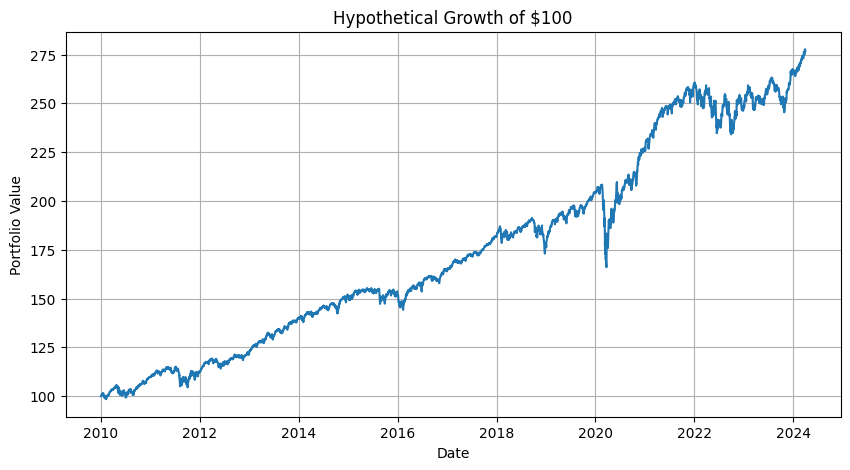

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(momentum_port_returns['Dates'], momentum_port_returns['Portfolio Value'], linestyle='-')
plt.title('Hypothetical Growth of $100')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()

In [ ]:
# Load the CSV file
df = pd.read_csv("Sixty_forty.csv")

# Renaming the columns
df.rename(columns={
    df.columns[1]: 'Bond_Performance',
    df.columns[2]: 'SPX_Performance'
}, inplace=True)

# Converting the 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

# Dropping rows where 'Dates' is NaT (Not a Time)
df.dropna(subset=['Dates'], inplace=True)

# Backfilling missing values in 'Bond_Performance' and 'SPX_Performance' columns
df['Bond_Performance'].fillna(method='bfill', inplace=True)
df['SPX_Performance'].fillna(method='bfill', inplace=True)

df

,Dates,Bond_Performance,SPX_Performance
0,2009-12-31,-1.5631,1.9313
1,2010-01-01,-1.5631,1.9313
2,2010-01-04,-1.4315,3.5710
3,2010-01-05,-0.9969,3.8948
4,2010-01-06,-1.0864,3.9970
...,...,...,...
3713,2024-03-26,36.7395,526.0779
3714,2024-03-27,37.0980,531.5564
3715,2024-03-28,37.0929,532.2807
3716,2024-03-29,37.0929,532.2807


In [ ]:
for column in df.columns:
    if column != 'Dates':
        # Step 2 & 3: Create new column, convert to decimal, add 1, and multiply by 100
        df[f"{column}_transformed"] = (df[column] / 100 + 1) * 100

        # Step 4 & 5: Calculate the percentage change and store it in a new column
        df[f"{column}_pct_change"] = df[f"{column}_transformed"].pct_change()

        # Remove the original column
        #df.drop(column, axis = 1, inplace = True)

# Drop the transformed columns if you only need the percentage change columns
df.drop([col for col in df.columns if 'transformed' in col], axis=1, inplace=True)

df

,Dates,Bond_Performance,SPX_Performance,Bond_Performance_pct_change,SPX_Performance_pct_change
0,2009-12-31,-1.5631,1.9313,NaN,NaN
1,2010-01-01,-1.5631,1.9313,0.000000,0.000000
2,2010-01-04,-1.4315,3.5710,0.001337,0.016086
3,2010-01-05,-0.9969,3.8948,0.004409,0.003126
4,2010-01-06,-1.0864,3.9970,-0.000904,0.000984
...,...,...,...,...,...
3713,2024-03-26,36.7395,526.0779,0.000926,-0.002800
3714,2024-03-27,37.0980,531.5564,0.002622,0.008751
3715,2024-03-28,37.0929,532.2807,-0.000037,0.001147
3716,2024-03-29,37.0929,532.2807,0.000000,0.000000


In [ ]:
# Dropping the first row
df = df.iloc[1:]

# Backfilling NaN values
df = df.fillna(method='bfill')

# Creating the 60/40 portfolio
sixty_forty_portfolio = 0.6 * (df['SPX_Performance_pct_change']) + 0.4 * (df['Bond_Performance_pct_change'])

# Adding the portfolio to the dataframe
df['Sixty_Forty_Portfolio'] = sixty_forty_portfolio

# Creating a new dataframe with the dates and portfolio values
sixty_forty_portfolio_df = pd.DataFrame({
    'Dates': df["Dates"],
    'Sixty_Forty_Portfolio': sixty_forty_portfolio
}).reset_index(drop=True)

sixty_forty_portfolio_df

,Dates,Sixty_Forty_Portfolio
0,2010-01-01,0.000000
1,2010-01-04,0.010187
2,2010-01-05,0.003639
3,2010-01-06,0.000229
4,2010-01-07,0.002232
...,...,...
3712,2024-03-26,-0.001309
3713,2024-03-27,0.006299
3714,2024-03-28,0.000673
3715,2024-03-29,0.000000


In [ ]:
# Start with initial value of 100
initial_value = 100

# Create a new column for the cumulative value based on the described protocol
sixty_forty_portfolio_df['Cumulative_Value'] = initial_value

# Apply the cumulative return calculation
for i in range(1, len(sixty_forty_portfolio_df)):
    sixty_forty_portfolio_df.loc[i, 'Cumulative_Value'] = (
        sixty_forty_portfolio_df.loc[i-1, 'Cumulative_Value'] *
        (1 + (sixty_forty_portfolio_df.loc[i, 'Sixty_Forty_Portfolio'])
    ))

sixty_forty_portfolio_df

,Dates,Sixty_Forty_Portfolio,Cumulative_Value
0,2010-01-01,0.000000,100.000000
1,2010-01-04,0.010187,101.018655
2,2010-01-05,0.003639,101.386309
3,2010-01-06,0.000229,101.409487
4,2010-01-07,0.002232,101.635841
...,...,...,...
3712,2024-03-26,-0.001309,359.340967
3713,2024-03-27,0.006299,361.604461
3714,2024-03-28,0.000673,361.847904
3715,2024-03-29,0.000000,361.847904


In [ ]:
# Ensure 'Dates' columns are in datetime format
sixty_forty_portfolio_df['Dates'] = pd.to_datetime(sixty_forty_portfolio_df['Dates'])
momentum_port_returns['Dates'] = pd.to_datetime(momentum_port_returns['Dates'])

# Convert momentum daily returns to the same format (dividing by 100)
momentum_port_returns['Daily Returns'] = momentum_port_returns['Daily Returns'] / 100

# Merge the dataframes on 'Dates'
merged_df = pd.merge(
    sixty_forty_portfolio_df[['Dates', 'Sixty_Forty_Portfolio']],
    momentum_port_returns[['Dates', 'Daily Returns']],
    on='Dates',
    how='inner'
)

# Rename columns appropriately
merged_df.rename(columns={
    'Sixty_Forty_Portfolio': 'Sixty_Forty_Daily_Returns',
    'Daily Returns': 'Momentum_Daily_Returns'
}, inplace=True)

# Ensure no missing values
merged_df.dropna(inplace=True)

# Calculate cumulative returns from daily returns
merged_df['Sixty_Forty_Cumulative'] = (1 + merged_df['Sixty_Forty_Daily_Returns']).cumprod() - 1
merged_df['Momentum_Cumulative'] = (1 + merged_df['Momentum_Daily_Returns']).cumprod() - 1

# Function to calculate annualized return
def annualized_return(daily_returns):
    cumulative_return = (1 + daily_returns).prod() - 1
    days = len(daily_returns)
    return (1 + cumulative_return) ** (252 / days) - 1

# Calculate the annualized return for the entire period
sixty_forty_annual_return = annualized_return(merged_df['Sixty_Forty_Daily_Returns'])
momentum_annual_return = annualized_return(merged_df['Momentum_Daily_Returns'])

# Calculate the standard deviation of daily returns
sixty_forty_std_dev = merged_df['Sixty_Forty_Daily_Returns'].std()
momentum_std_dev = merged_df['Momentum_Daily_Returns'].std()

# Annualize the standard deviation
sixty_forty_annual_std_dev = sixty_forty_std_dev * np.sqrt(252)
momentum_annual_std_dev = momentum_std_dev * np.sqrt(252)

# Calculate the Sharpe ratio
sixty_forty_sharpe_ratio = sixty_forty_annual_return / sixty_forty_annual_std_dev
momentum_sharpe_ratio = momentum_annual_return / momentum_annual_std_dev

# Print the results
print(f"60/40 Portfolio Annualized Return: {sixty_forty_annual_return}")
print(f"Momentum Portfolio Annualized Return: {momentum_annual_return}")
print(f"60/40 Portfolio Annualized Standard Deviation: {sixty_forty_annual_std_dev}")
print(f"Momentum Portfolio Annualized Standard Deviation: {momentum_annual_std_dev}")
print(f"60/40 Portfolio Sharpe Ratio: {sixty_forty_sharpe_ratio}")
print(f"Momentum Portfolio Sharpe Ratio: {momentum_sharpe_ratio}")

# Display the merged dataframe for verification
print(merged_df.head())

60/40 Portfolio Annualized Return: 0.09441901159728316
Momentum Portfolio Annualized Return: 0.07423860495293333
60/40 Portfolio Annualized Standard Deviation: 0.10380883720871532
Momentum Portfolio Annualized Standard Deviation: 0.08496437073968881
60/40 Portfolio Sharpe Ratio: 0.9095469531890312
Momentum Portfolio Sharpe Ratio: 0.873761605089541
       Dates  Sixty_Forty_Daily_Returns  Momentum_Daily_Returns  \
0 2010-01-04                   0.010187                0.005748   
1 2010-01-05                   0.003639                0.001282   
2 2010-01-06                   0.000229                0.001334   
3 2010-01-07                   0.002232                0.002349   
4 2010-01-08                   0.002083                0.000967   

   Sixty_Forty_Cumulative  Momentum_Cumulative  
0                0.010187             0.005748  
1                0.013863             0.007037  
2                0.014095             0.008380  
3                0.016358             0.010749  
4 

In [ ]:
# Ensure 'Dates' columns are in datetime format
sixty_forty_portfolio_df['Dates'] = pd.to_datetime(sixty_forty_portfolio_df['Dates'])
momentum_port_returns['Dates'] = pd.to_datetime(momentum_port_returns['Dates'])

# Convert momentum daily returns to the same format (dividing by 100)
momentum_port_returns['Daily Returns'] = momentum_port_returns['Daily Returns'] / 100

# Merge the dataframes on 'Dates'
merged_df = pd.merge(
    sixty_forty_portfolio_df[['Dates', 'Sixty_Forty_Portfolio']],
    momentum_port_returns[['Dates', 'Daily Returns']],
    on='Dates',
    how='inner'
)

# Rename columns appropriately
merged_df.rename(columns={
    'Sixty_Forty_Portfolio': 'Sixty_Forty_Daily_Returns',
    'Daily Returns': 'Momentum_Daily_Returns'
}, inplace=True)

# Ensure no missing values
merged_df.dropna(inplace=True)

# Calculate cumulative returns from daily returns
merged_df['Year'] = merged_df['Dates'].dt.year

# Initialize the annual returns list
annual_returns = []

# Function to calculate annualized return
def annualized_return(start_value, end_value, days):
    return (end_value / start_value) ** (252 / days) - 1

# Calculate annualized returns year by year
for year, group in merged_df.groupby('Year'):
    start_value_sixty_forty = 100  # Starting value for each year
    start_value_momentum = 100

    end_value_sixty_forty = start_value_sixty_forty * (1 + group['Sixty_Forty_Daily_Returns']).prod()
    end_value_momentum = start_value_momentum * (1 + group['Momentum_Daily_Returns']).prod()

    days = len(group)

    sixty_forty_annual_return = annualized_return(start_value_sixty_forty, end_value_sixty_forty, days)
    momentum_annual_return = annualized_return(start_value_momentum, end_value_momentum, days)

    annual_returns.append({
        'Year': year,
        'Sixty_Forty_Annual_Return': sixty_forty_annual_return,
        'Momentum_Annual_Return': momentum_annual_return
    })

annual_returns_df = pd.DataFrame(annual_returns)

# Print the results
print(annual_returns_df)

    Year  Sixty_Forty_Annual_Return  Momentum_Annual_Return
0   2010                   0.122597                0.096657
1   2011                   0.051897                0.024125
2   2012                   0.112368                0.086725
3   2013                   0.175571                0.150636
4   2014                   0.107383                0.076208
5   2015                   0.012688                0.010292
6   2016                   0.083993                0.074183
7   2017                   0.142999                0.108391
8   2018                  -0.022919               -0.019380
9   2019                   0.221509                0.147620
10  2020                   0.156097                0.112149
11  2021                   0.159845                0.142153
12  2022                  -0.156289               -0.046154
13  2023                   0.182486                0.078603
14  2024                   0.241557                0.157479


In [ ]:
#BETA, MOMENTUM, and VOLATILITY
# Ensure no missing values
merged_df.dropna(inplace=True)

# Calculate beta
cov_matrix = np.cov(merged_df['Momentum_Daily_Returns'], merged_df['Sixty_Forty_Daily_Returns'])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

# Calculate daily volatility
momentum_volatility_daily = merged_df['Momentum_Daily_Returns'].std()
sixty_forty_volatility_daily = merged_df['Sixty_Forty_Daily_Returns'].std()

# Annualize volatility (assuming 252 trading days in a year)
momentum_volatility_annualized = momentum_volatility_daily * np.sqrt(252)
sixty_forty_volatility_annualized = sixty_forty_volatility_daily * np.sqrt(252)

# Print the results
print(f"Beta: {beta}")
print(f"Momentum Portfolio Annualized Volatility: {momentum_volatility_annualized}")
print(f"60/40 Portfolio Annualized Volatility: {sixty_forty_volatility_annualized}")

# Display the merged dataframe for verification
print(merged_df.head())

Beta: 0.7824647996012182
Momentum Portfolio Annualized Volatility: 0.08496437073968881
60/40 Portfolio Annualized Volatility: 0.10380883720871532
       Dates  Sixty_Forty_Daily_Returns  Momentum_Daily_Returns  Year
0 2010-01-04                   0.010187                0.005748  2010
1 2010-01-05                   0.003639                0.001282  2010
2 2010-01-06                   0.000229                0.001334  2010
3 2010-01-07                   0.002232                0.002349  2010
4 2010-01-08                   0.002083                0.000967  2010


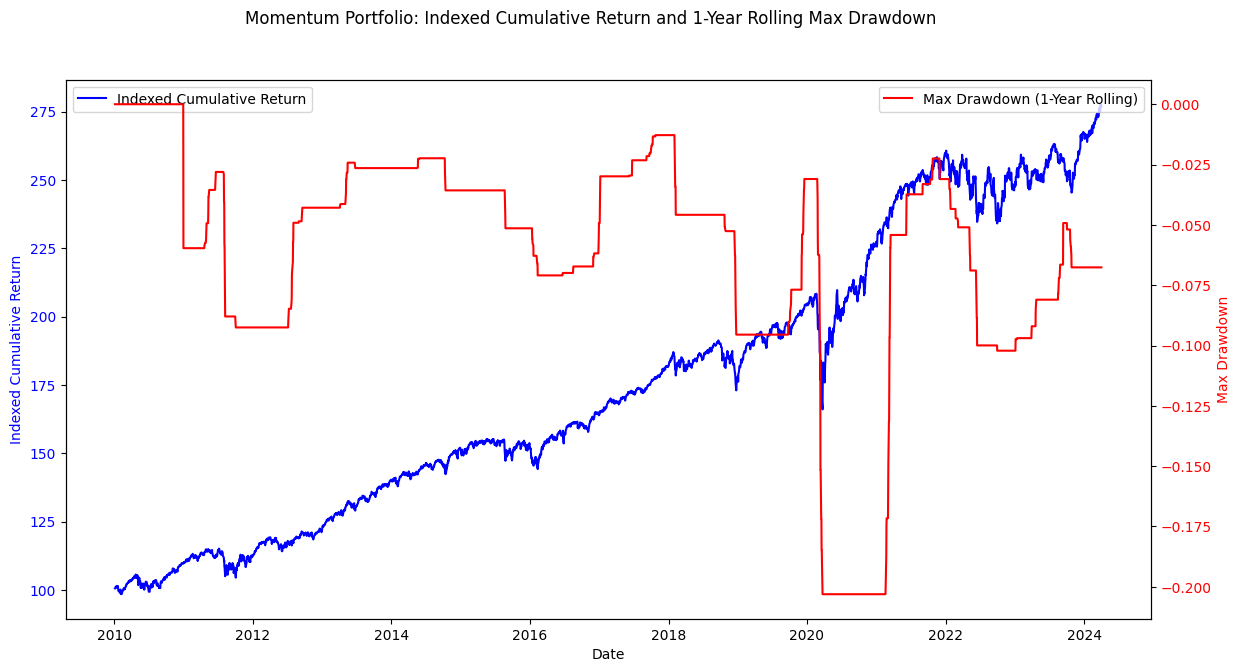

       Dates  Indexed_Cumulative_Return  Rolling_Max_Drawdown
0 2010-01-04                 100.574776                   0.0
1 2010-01-05                 100.703696                   0.0
2 2010-01-06                 100.838012                   0.0
3 2010-01-07                 101.074851                   0.0
4 2010-01-08                 101.172545                   0.0


In [ ]:
#MAX DRAWDOWN
# Ensure no missing values
merged_df.dropna(inplace=True)

# Calculate indexed cumulative returns of the momentum portfolio from 100
initial_value = 100
merged_df['Indexed_Cumulative_Return'] = initial_value * (1 + merged_df['Momentum_Daily_Returns']).cumprod()

# Function to calculate drawdown
def calculate_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown

# Calculate the rolling 1-year max drawdown on indexed cumulative returns
window = 252  # Assuming 252 trading days in a year
merged_df['Rolling_Max_Drawdown'] = merged_df['Indexed_Cumulative_Return'].rolling(window).apply(lambda x: calculate_drawdown(x).min(), raw=False)

# Fill NaN values in the Rolling_Max_Drawdown column with 0
merged_df['Rolling_Max_Drawdown'].fillna(0, inplace=True)

# Plot the indexed cumulative return and max drawdown
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the indexed cumulative return on the primary y-axis
ax1.plot(merged_df['Dates'], merged_df['Indexed_Cumulative_Return'], color='blue', label='Indexed Cumulative Return')
ax1.set_xlabel('Date')
ax1.set_ylabel('Indexed Cumulative Return', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis to plot the max drawdown
ax2 = ax1.twinx()
ax2.plot(merged_df['Dates'], merged_df['Rolling_Max_Drawdown'], color='red', label='Max Drawdown (1-Year Rolling)')
ax2.set_ylabel('Max Drawdown', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Momentum Portfolio: Indexed Cumulative Return and 1-Year Rolling Max Drawdown')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

# Display the first few rows of the dataframe for verification
print(merged_df[['Dates', 'Indexed_Cumulative_Return', 'Rolling_Max_Drawdown']].head())

In [ ]:
# Merging Cumulative_Value from sixty_forty_portfolio_df with Portfolio Value from momentum_port_returns by date
merged_df = pd.merge(momentum_port_returns,
                     sixty_forty_portfolio_df[['Dates', 'Cumulative_Value']],
                     on='Dates',
                     how='left')

# Renaming the columns as requested
merged_df.rename(columns={'Cumulative_Value': 'Sixty Forty Portfolio',
                          'Portfolio Value': 'Momentum Portfolio'}, inplace=True)

merged_df

,Daily Returns,Dates,Momentum Portfolio,Sixty Forty Portfolio
0,0.000000,2009-12-31,100.000000,NaN
1,0.574776,2010-01-04,100.574776,101.018655
2,0.128183,2010-01-05,100.703696,101.386309
3,0.133378,2010-01-06,100.838012,101.409487
4,0.234871,2010-01-07,101.074851,101.635841
...,...,...,...,...
3580,-0.111376,2024-03-25,275.190351,359.812133
3581,-0.071557,2024-03-26,274.993432,359.340967
3582,0.784188,2024-03-27,277.149897,361.604461
3583,0.213755,2024-03-28,277.742318,361.847904


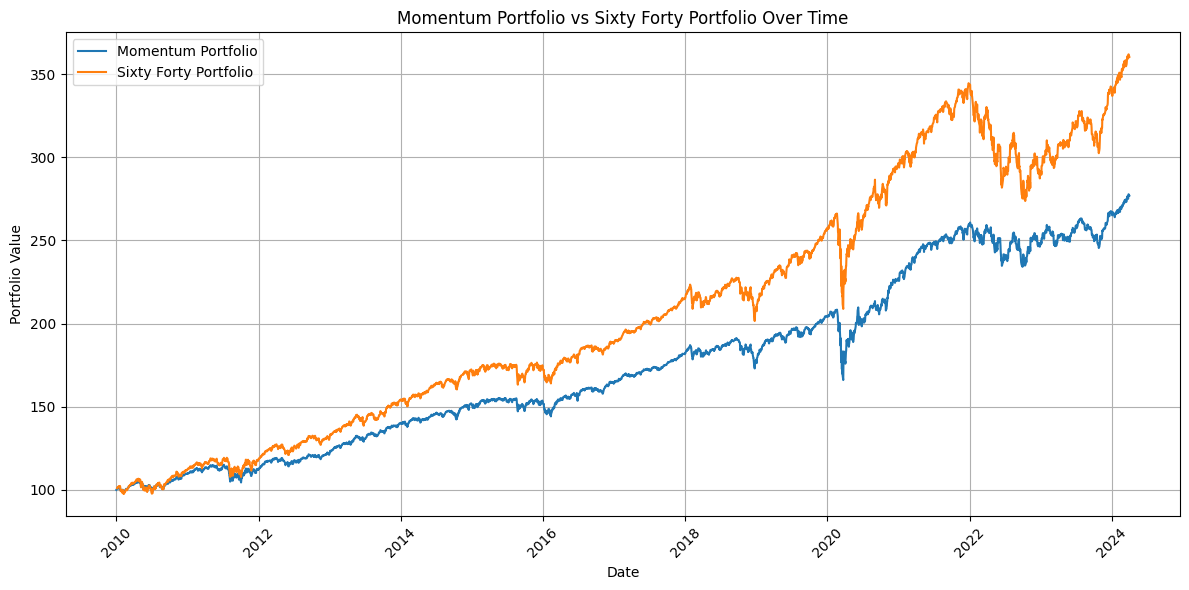

In [ ]:
# Create a line graph of Momentum Portfolio and Sixty Forty Portfolio by date
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Dates'], merged_df['Momentum Portfolio'], label='Momentum Portfolio')
plt.plot(merged_df['Dates'], merged_df['Sixty Forty Portfolio'], label='Sixty Forty Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Momentum Portfolio vs Sixty Forty Portfolio Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()